# Robo Cafe LA

Hemos decidido abrir un pequeño café regentado por robots en Los Ángeles. 

El proyecto es prometedor pero caro, así que hemos decidido intentar atraer inversionistas que están interesados en las condiciones actuales del mercado.

¿Será capaz de mantener el éxito cuando la novedad de los camareros robot desaparezca?

Prepararemos un estudio de mercado con los datos que tenemos, procedentes de fuentes abiertas sobre restaurantes en LA.


## Biblioteca

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Explorar los Datos

In [2]:
rest_data_us = pd.read_csv('/datasets/rest_data_us.csv')

In [3]:
rest_data_us.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


El marco de datos rest_data_us contiene información sobre el nombre, el tipo, el estado de la cadena, la dirección y el número de asientos de cada restaurante del conjunto de datos. Este marco de datos puede utilizarse para análisis y visualizaciones posteriores con el fin de responder a diversas preguntas de investigación sobre el mercado de la restauración en Los Ángeles.

In [4]:
rest_data_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
rest_data_us.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [7]:
rest_data_us = rest_data_us.dropna()

Revisamso valores ausentes y aparecen 3 en la columna 'chain'. Los eliminamos ya que representa el: 0.031% de la muestra. 

In [35]:
duplicates = rest_data_us[rest_data_us.duplicated(subset=['object_name'], keep=False)]
duplicates['object_name']

8              ABC DONUTS
10          EL POLLO LOCO
27      NORM'S RESTAURANT
33       ONO HAWAIIAN BBQ
37             WABA GRILL
              ...        
9605             YAMAKASE
9608      GO GET EM TIGER
9627          PIZZA BUONA
9639           MCDONALD'S
9648          JUICY WINGZ
Name: object_name, Length: 1503, dtype: object

Revisamos los duplicados en 'object_name' y aparecen 1503 lo cual es el 15.573% de la muestra. Vamos a verificar si los nombres comparten diferentes direcciones y podamos continuar ya que serian la presencia de cadenas o varios restaurantes con el mismo nombre en diferentes calles.

In [36]:
df_sorted = duplicates.sort_values(by='object_name')
df_sorted

,id,object_name,address,chain,object_type,number,street_num
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,3027
4497,16283,ABC DONUTS,4555 E 3RD ST # 1A,True,Fast Food,21,4555
4569,16355,ACA GRILL,3062 W 8TH ST,True,Restaurant,25,3062
2874,14660,ACA GRILL,1300 S SAN PEDRO ST STE 220,True,Restaurant,118,1300
128,11914,ADMIRALS CLUB,500 WORLD WAY,False,Restaurant,205,500
...,...,...,...,...,...,...,...
3414,15200,Z PIZZA,5933 W CENTURY BLVD STE C,True,Pizza,31,5933
6957,18743,Z PIZZA,123 N LARCHMONT BLVD,True,Pizza,48,123
6943,18729,Z PIZZA,2664 N GRIFFITH PARK BLVD,True,Pizza,44,2664
106,11892,ZANKOU CHICKEN,7851 W SUNSET BLVD,True,Restaurant,40,7851


Los duplicados en object_name tienen diferentes direcciones lo cual no es un problema para continuar con el analisis de los datos.

## Análisis de datos

### Investigamos las proporciones de los distintos tipos de establecimientos.

In [8]:
rest_data_us['object_type'].value_counts()

Restaurant    7253
Fast Food     1066
Cafe           435
Pizza          319
Bar            292
Bakery         283
Name: object_type, dtype: int64

#### Trazamos un gráfico.

Se calcula el porcentaje de cada tipo de establecimiento sobre el total y se muestra en las anotaciones del gráfico.

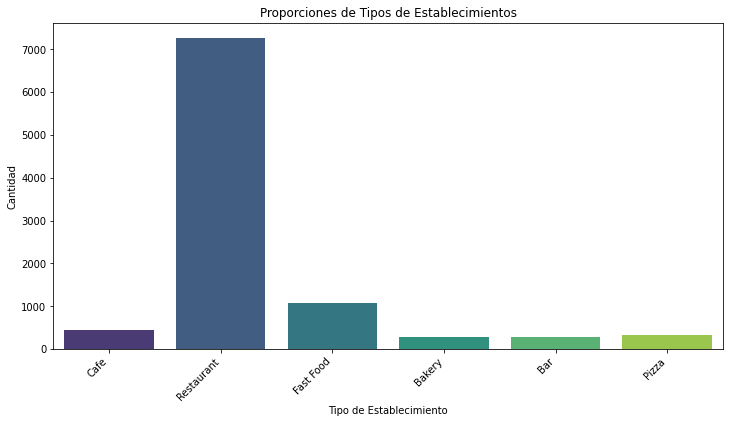

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='object_type', data=rest_data_us, palette='viridis')
plt.title('Proporciones de Tipos de Establecimientos')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

El gráfico muestra que el tipo de establecimiento más común es el Restaurant. El siguiente tipo más común es Fast Food y Cafe

### Investigamos las proporciones de los establecimientos que pertenecen a una cadena y de los que no. 

Trazamos un gráfico

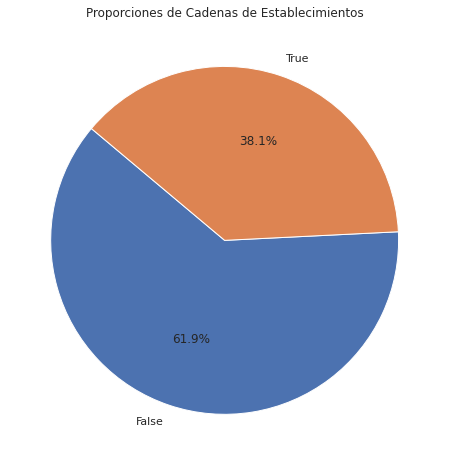

In [10]:
chain = rest_data_us['chain'].value_counts()
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.pie(chain, labels=chain.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('deep'))
plt.title('Proporciones de Cadenas de Establecimientos')
plt.show()

El 60.9% no pertenece a una cadena y el 38.1% si pertenece a una cadena. 
El gráfico muestra que los establecimientos sin cadena dominan a los establecimientos con cadena.

### ¿Qué tipo de establecimiento es habitualmente una cadena?

In [11]:
chain = pd.crosstab(rest_data_us['object_type'], rest_data_us['chain'], margins=True, margins_name='Total')
print(chain)

chain        False  True  Total
object_type                    
Bakery           0   283    283
Bar            215    77    292
Cafe           169   266    435
Fast Food      461   605   1066
Pizza          166   153    319
Restaurant    4961  2292   7253
Total         5972  3676   9648


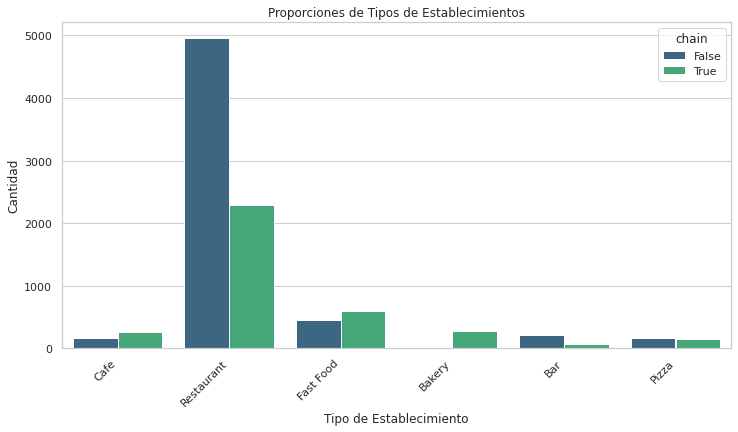

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='object_type', hue='chain', data=rest_data_us, palette='viridis')
plt.title('Proporciones de Tipos de Establecimientos')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

El establecimiento que habitualmente es una cadena es: 
    
    Restaurant con la cantidad de: 2292
    
Apesar que en el grafico anterior es mas comun que los establecimientos sin cadena dominan el mercado. En Cafe que es nuestro mercado y Fast Food los que tienen mayor porcentaje son los que tienen cadena.    

### ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?


Sabemos que el promedio de estableciomientos de cadenas es el 38.1%.

Vamos a calcular la cantidad de asientos por tipo de establecimiento.

In [13]:
seats_sum_chain = rest_data_us[rest_data_us['chain'] == True]['number'].mean()
seats_sum_no_chain = rest_data_us[rest_data_us['chain'] == False]['number'].mean()

print(f"Media de asientos por establecimiento para cadenas: {seats_sum_chain:.2f}")
print(f"Media de asientos por establecimiento para no cadenas: {seats_sum_no_chain:.2f}")

Media de asientos por establecimiento para cadenas: 39.69
Media de asientos por establecimiento para no cadenas: 46.17


Podemos verificar que el numero de asientos es menor que los establecimientos de no cadena.
Pero solo estan abajo en la media por 3.

Vamos a verificar en que tipo de establecimientos tienen mas asientos que las no cadenas.

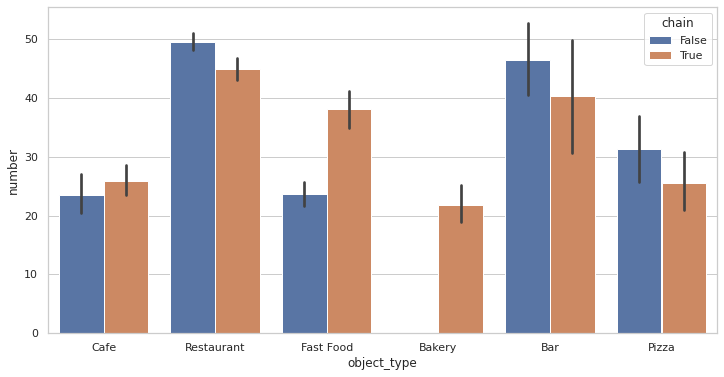

In [14]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="object_type", y="number", hue="chain", data=rest_data_us)

Podemos observar una diferencia significativa en el número de asientos en la categoría de comida rápida y cafe.

Asi que la respuesta es: Pocos establecimientos con un montón de asientos

### Determinamos el promedio de número de asientos para cada tipo de restaurante.


In [15]:
seat_mean_per_type = (rest_data_us
                      .groupby('object_type')
                      .agg({'number':'mean'})
                      .rename(columns={'number':'avg_number_of_seats'})).reset_index()
seat_mean_per_type

,object_type,avg_number_of_seats
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,25.000000
3,Fast Food,31.837711
4,Pizza,28.545455
5,Restaurant,48.048807


Generamos un gráfico de barras que muestra el número promedio de asientos para cada tipo de establecimiento.

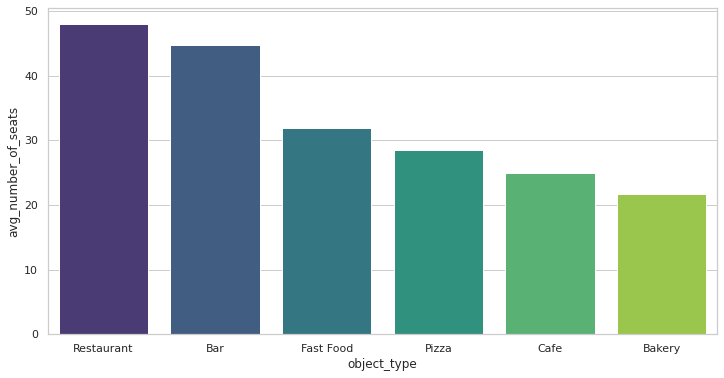

In [16]:
plt.figure(figsize=(12,6))
seat_mean_per_type_graph = sns.barplot(data=seat_mean_per_type.nlargest(6,'avg_number_of_seats'), 
                                  x='object_type',
                                  y='avg_number_of_seats',
                                  palette='viridis')

En este gráfico podemos ver que el restaurante es el establecimiento con más asientos promedios, seguido de los bares y los locales de comida rápida.

### Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [17]:
rest_data_us['street_num'] = rest_data_us['address'].str.extract(r'(?P<StreetNo>\d{,5})')

Vamos a extraer los números de calle de una columna 'address' en un DataFrame y crear una nueva columna 'street_num'.

In [18]:
rest_data_us.head()

,id,object_name,address,chain,object_type,number,street_num
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,3708
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,100
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,6801
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100


### Trazamos un gráfico de las diez mejores calles por número de restaurantes.

In [19]:
rest_data_us_street = (rest_data_us
                       .groupby('street_num')
                       .agg({'id':'count','number':'mean'})
                       .rename(columns={'id':'number_of_establishment', 'number': 'avg_number_of_seats'})
                       .reset_index()
)

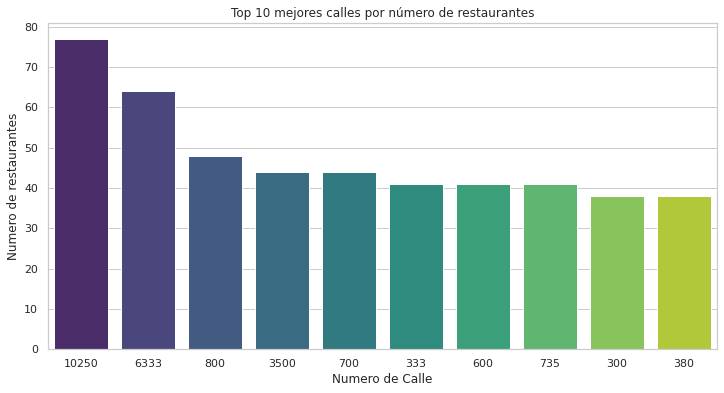

In [20]:
plt.figure(figsize=(12,6))
street_graph = sns.barplot(data=rest_data_us_street.nlargest(10,'number_of_establishment'), 
                                  x='street_num',
                                  y='number_of_establishment',
                                  palette='viridis')
    
plt.title('Top 10 mejores calles por número de restaurantes')
plt.xlabel('Numero de Calle')
plt.ylabel('Numero de restaurantes')
plt.show()

El gráfico resultante muestra las 10 calles con mayor número de establecimientos. El eje x representa el número de calle extraído de la columna street_num, y el eje y representa el número de establecimientos de cada calle.

El gráfico nos permite identificar rápidamente las calles más concurridas en cuanto al número de establecimientos, lo que puede ser útil para las empresas que deseen abrir un nuevo establecimiento en un lugar muy transitado.

### Encuentramos el número de calles que solo tienen un restaurante.

In [21]:
rest_data_us_street[rest_data_us_street['number_of_establishment'] == 1].head()

,street_num,number_of_establishment,avg_number_of_seats
1,00936,1,21.0
2,01253,1,29.0
3,03742,1,39.0
4,05358,1,113.0
5,0800,1,195.0


In [22]:
rest_data_us_street[rest_data_us_street['number_of_establishment'] == 1]['street_num'].count()

2125

In [23]:
rest_data_us_street['number_of_establishment'].describe()

count    3997.000000
mean        2.413810
std         3.582419
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        77.000000
Name: number_of_establishment, dtype: float64

Existen 2125 calles en LA que solo cuentan con un restaurante.

La calle con mas tiene 77.

### Para las calles con muchos restaurantes, analizaremos la distribución del número de asientos.

In [24]:
np.percentile(rest_data_us_street['number_of_establishment'], [90, 95, 99])

array([ 4.,  6., 18.])

In [25]:
top_data_us_street = rest_data_us_street[rest_data_us_street['number_of_establishment'] > 6]

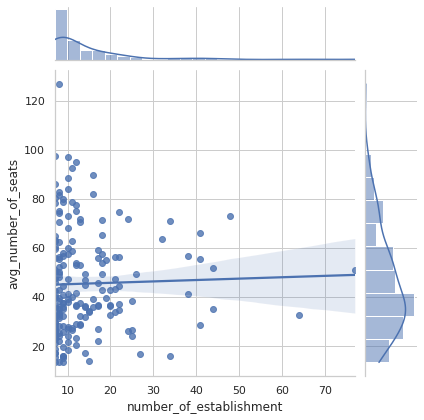

In [26]:
sns.jointplot(
    data=top_data_us_street, 
    x='number_of_establishment', 
    y='avg_number_of_seats', 
    kind='reg', 
    palette='viridis')
plt.show()

El gráfico con línea de regresión entre el número de establecimientos y el número promedio de asientos muestra una correlación positiva entre estas dos variables. 

A medida que aumenta el número de establecimientos en una calle, el número medio de asientos también tiende a aumentar.

## Conclusion

Pudimos revisar que los tipos de establecimiento más populares en Los Ángeles son los restaurantes, seguidos de los locales de comida rápida y las cafeterías. 

También encontramos que el número medio de asientos en los restaurantes de Los Ángeles es de 48. 

La mayoria de las calles tienen al menos 2 locales de comida, pero algunas calles tienen más de 4 establecimientos.

También hemos comprobado que existe una correlación positiva entre el número de restaurantes de una calle y el número medio de asientos de esos restaurantes.

En conclusión, este proyecto proporciona información sobre el panorama gastronómico de Los Ángeles. 

Los propietarios de restaurantes y los inversores pueden utilizar estos datos para tomar decisiones informadas sobre la apertura de nuevos restaurantes o la inversión en los ya existentes. 

Tambien pudimos revisar que hay calles con mas de 10 estableciemintos con pocos asientos esas calles serian una buena opcion para desarrollar e intorducir una nueva cadena.

## Presentación

Preparamos una presentación de la investigación para compartir con el grupo de inversionistas. 
Incluimos el enlace a la presentación:
Presentation: <https://drive.google.com/file/d/1VhsdnynUxYgIyghdBCOkazYcuq1PuhNO/view?usp=sharing> 

_________________